In [1]:
import numpy as np
import matplotlib.pyplot as plt

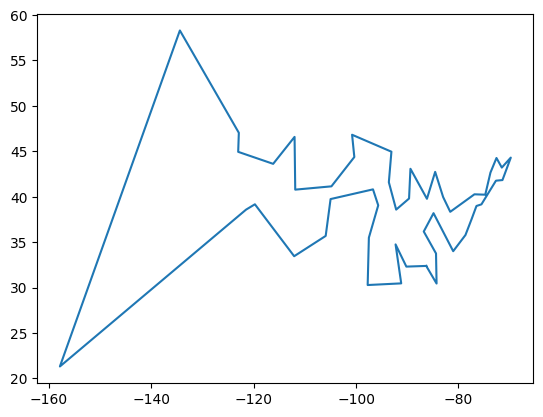

In [22]:
data=np.loadtxt("output.dat")
data=np.append(data,data[0])
data=np.reshape(data,(int(len(data)/2),2))

plt.plot(data[:,0],data[:,1])
plt.show()